Cost opimization Review Period R

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm 

In [2]:
def normal_loss_standard(x):
    return norm.pdf(x) - x*(1-norm.cdf(x))

In [3]:
def cost(h, d_mu, R, z, x_std, k, b):
    return h*(d_mu*R/2+x_std*z)+ k/R + b*x_std*normal_loss_standard(z)/R

In [4]:
def CSL_optimial(b, n, R):
    return 1-(h*R)/b

In [5]:
df = pd.DataFrame(columns=['Review Period', 'Inventory Cost', 'Cycle Service Level', 'Fill Rate'])

In [6]:
L = 1
h, d_mu, d_std, k, b = 1.25, 100, 25, 1000, 50

In [7]:
for R in [1, 2, 3, 4, 5, 6, 7]:
    x_std = d_std*np.sqrt(R+L)
    alpha = CSL_optimial(b, h, R)
    z = norm.ppf(alpha)
    beta = 1 - x_std*normal_loss_standard(z)/R/d_mu
    df = df.append({'Cycle Service Level': alpha, 'Fill Rate':beta, 'Inventory Cost':cost(h,d_mu,R,z,x_std,k,b), 'Review Period' :R}, ignore_index=True)

   Review Period  Inventory Cost  Cycle Service Level  Fill Rate
0            1.0     1165.817263                0.975   0.996660
1            2.0      736.647606                0.950   0.995477
2            3.0      638.796185                0.925   0.994402
3            4.0      622.633188                0.900   0.993384
4            5.0      638.559028                0.875   0.992399
5            6.0      670.183362                0.850   0.991435
6            7.0      710.553317                0.825   0.990482


<AxesSubplot:xlabel='Review Period'>

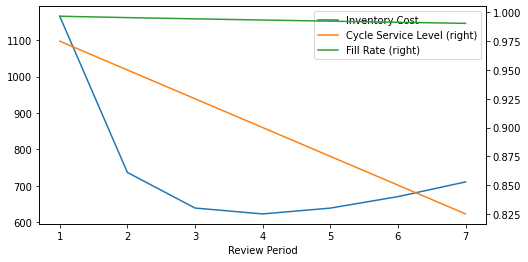

In [10]:
print(df)
df.plot(y=['Inventory Cost','Cycle Service Level','Fill Rate'],x='Review Period',secondary_y=['Cycle Service Level','Fill Rate'], figsize=(8,4))